<a href="https://colab.research.google.com/github/jthurber24/datascience3/blob/main/ds3010Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.api as sm
from sklearn import metrics, neighbors
import matplotlib.pyplot as plt

data = pd.read_csv('DiabetesSample.csv') #calls the Diabetes file that's been uploaded into colab
#print(data) 

corMat = data.corr() # creates a correlation matrix
print(corMat)


                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.271799  0.206232   0.064943  0.196293   
HighBP                    0.271799  1.000000  0.295426   0.098435  0.188701   
HighChol                  0.206232  0.295426  1.000000   0.086366  0.093764   
CholCheck                 0.064943  0.098435  0.086366   1.000000  0.032768   
BMI                       0.196293  0.188701  0.093764   0.032768  1.000000   
Smoker                    0.059623  0.102754  0.087396  -0.011404  0.011155   
Stroke                    0.103475  0.127638  0.088684   0.022348  0.012920   
HeartDiseaseorAttack      0.183291  0.209248  0.172477   0.041136  0.045915   
PhysActivity             -0.120250 -0.121743 -0.079298   0.005820 -0.137495   
Fruits                   -0.040222 -0.041750 -0.040696   0.023471 -0.084884   
Veggies                  -0.060257 -0.063631 -0.040998   0.002643 -0.058841   
HvyAlcoholConsump        -0.056774 -0.004217 -0.0131

In [ ]:
pred = data[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
             'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
             'AnyHealthcare', 'GenHlth', 'MentHlth', 'DiffWalk',
             'Sex', 'Age', 'Education', 'Income']] # gets predictors from the dataframe (cols)
res = data['Diabetes_012'] 

print('Counts of each value in the diabetes columns')
print('no diabetes: ', data['Diabetes_012'].value_counts()[0])
print('pre diabetes: ',data['Diabetes_012'].value_counts()[1])
print('diabetes: ',data['Diabetes_012'].value_counts()[2])


Counts of each value in the diabetes columns
no diabetes:  67522
pre diabetes:  1541
diabetes:  10937


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pred, res, test_size=0.30, train_size=0.70)

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train) # performs KNN with k=1 on above data
print(knnMod)
predknnMod = knnMod.predict(x_test) # tests model
knncMat = metrics.confusion_matrix(y_test, predknnMod) # creates a confusion matrix
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score 
print("Accuracy: ", accuracy) 

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 3).fit(x_train, y_train) # performs KNN with k=3 on above data
print(knnMod)
predknnMod = knnMod.predict(x_test) # tests model
knncMat = metrics.confusion_matrix(y_test, predknnMod) # creates a confusion matrix
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score 
print("Accuracy: ", accuracy) 

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train) ## performs KNN with k=5 on above data
print(knnMod)
predknnMod = knnMod.predict(x_test)
knncMat = metrics.confusion_matrix(y_test, predknnMod)
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score
print("Accuracy: ", accuracy)

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) ## performs KNN with k=7 on above data
print(knnMod)
predknnMod = knnMod.predict(x_test)
knncMat = metrics.confusion_matrix(y_test, predknnMod)
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score 
print("Accuracy: ", accuracy)

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 10).fit(x_train, y_train) ## performs KNN with k=7 on above data
print(knnMod)
predknnMod = knnMod.predict(x_test)
knncMat = metrics.confusion_matrix(y_test, predknnMod)
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score
print("Accuracy: ", accuracy)

KNeighborsClassifier(n_neighbors=1)
[[17774   382  2119]
 [  323    12   102]
 [ 2245   113   930]]
Accuracy:  0.7798333333333334
KNeighborsClassifier(n_neighbors=3)
[[19062    27  1186]
 [  364     0    73]
 [ 2528    12   748]]
Accuracy:  0.8254166666666667
KNeighborsClassifier()
[[19369    13   893]
 [  378     1    58]
 [ 2647    12   629]]
Accuracy:  0.8332916666666667
KNeighborsClassifier(n_neighbors=7)
[[19541     1   733]
 [  388     0    49]
 [ 2712     1   575]]
Accuracy:  0.8381666666666666
KNeighborsClassifier(n_neighbors=10)
[[19811     0   464]
 [  404     0    33]
 [ 2866     0   422]]
Accuracy:  0.8430416666666667


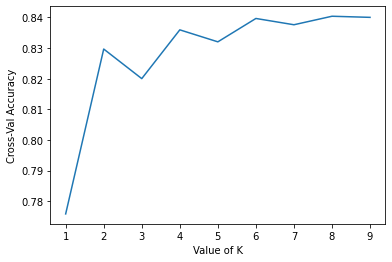

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 and 10
k_range = range(1, 10)
k_scores = []

# get average of cross  val for each k from 1 to 10
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, pred, res, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
# plot
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross-Val Accuracy')
plt.show()

In [ ]:
costMat = [[0, 1, 10],
           [5, 0, 2],
           [10, 1, -5]]

knnMod = neighbors.KNeighborsClassifier(n_neighbors = 8).fit(x_train, y_train) 
print(knnMod)
predknnMod = knnMod.predict(x_test)
knncMat = metrics.confusion_matrix(y_test, predknnMod)
print(knncMat)
accuracy = metrics.accuracy_score(y_test, predknnMod) # computes the accuracy score
print("Accuracy: ", accuracy)

KNeighborsClassifier(n_neighbors=8)
[[19771     0   504]
 [  396     0    41]
 [ 2861     1   426]]
Accuracy:  0.8415416666666666


In [ ]:
from sklearn import tree

treeClass = tree.DecisionTreeClassifier(random_state=1) # creates the tree
trainTree = treeClass.fit(x_train, y_train) # trains the model

from sklearn import metrics

predTree = trainTree.predict(x_test) # tests the model\
accuracy = metrics.accuracy_score(y_test, predTree) # computes the accuracy score 
# print(accuracy)
print('testing score',treeClass.score(x_test,y_test))

# not plotted because the testing score is not better than what we can get from the knn algorithm

testing score 0.767875
